In [1]:
# https://mitu.co.in/dataset
# data => Salary_Data.csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')
df;

In [3]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

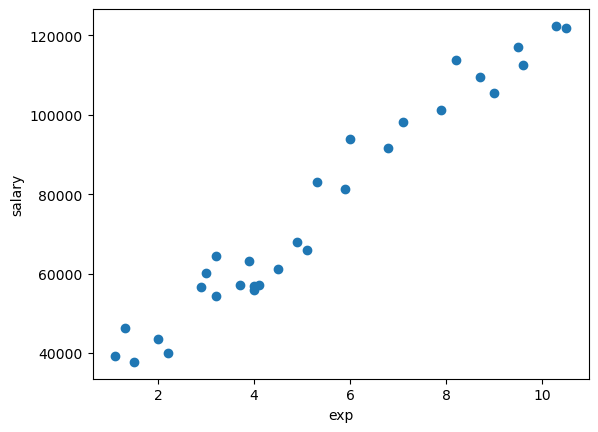

In [4]:
plt.xlabel('exp')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'], df['Salary']);

In [5]:
# separate the data

x = df[['YearsExperience']]   # input
y = df['Salary']   # output

In [6]:
x;

In [7]:
x.shape

(30, 1)

#### cross validation / holdout method

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [11]:
x_train.shape, y_train.shape

((22, 1), (22,))

In [12]:
x_test.shape, y_test.shape

((8, 1), (8,))

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
# predict on test data

y_pred = lr.predict(x_test)

In [17]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [18]:
# dataframe => actual (y_test), predicted (y_pred)

In [19]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result;

In [20]:
# evaluate
# mean absolute error
22407940.143340684
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [23]:
lr.coef_

array([9379.71049195])

In [24]:
lr.intercept_

26986.691316737248

In [25]:
lr.predict([[18]])

/home/aditya/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([195821.48017177])

In [26]:
9379.71049195 * 18 + 26986.691316737248

195821.48017183723

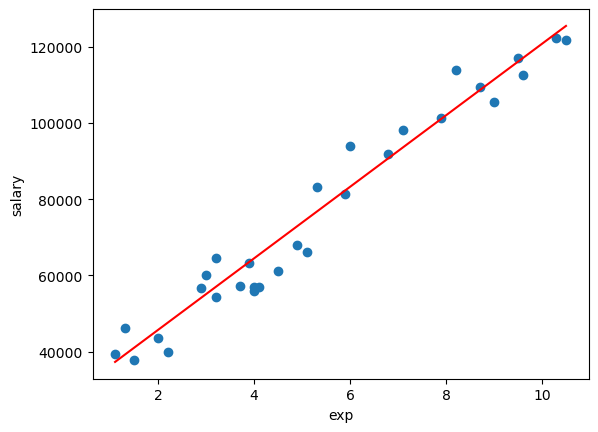

In [57]:
plt.xlabel('exp')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'], df['Salary']);
plt.plot(df['YearsExperience'], lr.predict(x), color = 'red');